# Análise das tarefas de depósito Y999

#### Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from config import *

#### Pré-definições de formatações

In [2]:
#paleta = 'rocket'
#tamanho_grafico = [16,10]

#### Listando os arquivos das tarefas e armazenando em uma variável

<p>Período dos dados das tarefas: <strong>10 de fevereiro</strong> a <strong>09 de abril</strong>

In [3]:
path = 'dados/Tarefas/tarefas/'
arquivos = os.listdir(path)
arquivos

['tarefas_01-01_a_31-01.xlsx',
 'tarefas_01-02_a_28-02.xlsx',
 'tarefas_01-03_a_31-03.xlsx',
 'tarefas_01-04_a_30-04.xlsx',
 'tarefas_01-05_a_28-05.xlsx']

#### Laço 'for' para criar variável com todos os arquivos da pasta de tarefas

In [4]:
lista = []

for n in range(0,len(arquivos)):
    file = path+arquivos[n]
    print(file)
    #c_time = time.strftime("%d/%m/%Y", time.strptime(time.ctime(os.path.getmtime(path))))
    locals()['dados%s' %n] = pd.read_excel(
        file,
        usecols=('C:I,M:N,P'),
        names=[
            'tipo_processo',
            'autor',
            'data_criacao',
            'hora_criacao',
            'pd_origem',
            'pd_destino',
            'produto',
            'tipo_estoque',
            'desc_tipo_estoque',
            'uc'
            ],
            dtype={
                'uc':'string'
                }
            )
    #locals()['dados%s' %n]['data'] = c_time
    lista.append(locals()['dados%s' %n])

dados/Tarefas/tarefas/tarefas_01-01_a_31-01.xlsx
dados/Tarefas/tarefas/tarefas_01-02_a_28-02.xlsx
dados/Tarefas/tarefas/tarefas_01-03_a_31-03.xlsx
dados/Tarefas/tarefas/tarefas_01-04_a_30-04.xlsx
dados/Tarefas/tarefas/tarefas_01-05_a_28-05.xlsx


#### Concatenando todos os dataframes de tarefas criados para uma variável

In [68]:
dados = pd.concat(lista)

In [69]:
dia_semana = {
    0:'seg',
    1:'ter',
    2:'qua',
    3:'qui',
    4:'sex',
    5:'sab',
    6:'dom',
}

In [70]:
dados['dia_semana'] = dados['data_criacao'].dt.weekday
dados['nome_dia_semana'] = dados['dia_semana'].map(dia_semana)

In [ ]:
dados_dropna_uc = dados.dropna(subset=['uc'])
dados_dropna_uc.shape

In [117]:
dados_dropna_uc.to_csv('dados/Tarefas/tarefas_concat.csv', sep=',', index=None)

In [72]:
dados.head()

,tipo_processo,autor,data_criacao,hora_criacao,pd_origem,pd_destino,produto,tipo_estoque,desc_tipo_estoque,uc,dia_semana,nome_dia_semana
0,Registro da saída de mercadoria,SP3PROD01,2022-01-31,23:59:53,AAP-LOP3-SA1,NaN,SA0155,Estoque utilização livre SA1,J1,<NA>,0,seg
1,Registro da entrada de mercadorias,SP3EMBA01,2022-01-31,23:59:34,NaN,GR-PROD,509002,Estoque utilização livre 005,01,<NA>,0,seg
2,Registro da saída de mercadoria,SP3EMBA01,2022-01-31,23:59:25,AAP-LOP3-SA1,NaN,SZ0357,Estoque utilização livre SA1,J1,<NA>,0,seg
3,Registro da entrada de mercadorias,SP3PROD01,2022-01-31,23:59:20,NaN,GR-PROD,SA0593,Estoque QA 005,03,<NA>,0,seg
4,Registro da saída de mercadoria,SP3PROD01,2022-01-31,23:59:09,AAP-LOP3-SA1,NaN,SA0155,Estoque utilização livre SA1,J1,<NA>,0,seg


In [73]:
dados.shape

(994369, 12)

In [74]:
dados.query('uc == "3346951"')

,tipo_processo,autor,data_criacao,hora_criacao,pd_origem,pd_destino,produto,tipo_estoque,desc_tipo_estoque,uc,dia_semana,nome_dia_semana
104513,Registro de transferência,SP3MISILVA,2022-01-11,15:09:51,NaN,LOG,SA0165,Estoque bloqueado 005,02,3346951,1,ter
106461,Registro da entrada de mercadorias,LPOLICARPO,2022-01-03,02:50:02,NaN,LOG,SA0165,Estoque QA 005,03,3346951,0,seg
124157,Registro da entrada de mercadorias,SP3MHLEITE,2022-03-15,11:16:51,NaN,LOG,SA0165,Estoque bloqueado 005,02,3346951,1,ter
133620,Registro da entrada de mercadorias,SP3MHLEITE,2022-03-14,09:18:00,NaN,LOG,SA0165,Estoque bloqueado 005,02,3346951,0,seg
17069,Inventário,SP3MHLEITE,2022-05-26,14:41:56,1,NaN,SA0165,Estoque bloqueado 005,02,3346951,3,qui
34149,Transferência interna de estoque,SP3MHLEITE,2022-05-25,10:15:44,INV,1,SA0165,Estoque bloqueado 005,02,3346951,2,qua
129890,Transferência interna de estoque,SP3VLALMEIDA,2022-05-15,20:20:58,LOG,INV,SA0165,Estoque bloqueado 005,02,3346951,6,dom


In [76]:
dados_dropna_uc['tipo_processo'].value_counts()

Transferência interna de estoque      211782
Registro de transferência             208890
Saída de depósito                     147442
Registro da entrada de mercadorias     90040
Inventário                              1943
Entrada em depósito                        5
Name: tipo_processo, dtype: int64

In [78]:
dados['tipo_processo'].value_counts()

Registro de transferência             421716
Transferência interna de estoque      211905
Saída de depósito                     147442
Registro da entrada de mercadorias    109235
Registro da saída de mercadoria       102123
Inventário                              1943
Entrada em depósito                        5
Name: tipo_processo, dtype: int64

In [79]:
dados.shape

(994369, 12)

In [80]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994369 entries, 0 to 236094
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   tipo_processo      994369 non-null  object        
 1   autor              994369 non-null  object        
 2   data_criacao       994369 non-null  datetime64[ns]
 3   hora_criacao       994369 non-null  object        
 4   pd_origem          664847 non-null  object        
 5   pd_destino         679173 non-null  object        
 6   produto            941276 non-null  object        
 7   tipo_estoque       941276 non-null  object        
 8   desc_tipo_estoque  941276 non-null  object        
 9   uc                 660102 non-null  string        
 10  dia_semana         994369 non-null  int64         
 11  nome_dia_semana    994369 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9), string(1)
memory usage: 98.6+ MB


#### Lendo os arquivos xlsx complementares e armazenando nas variáveis

In [81]:
file_estoque = 'dados/mon_28_05.xlsx'
file_posicoes = 'dados/arquivos_base/Posicoes.xlsx'
estoque = pd.read_excel(file_estoque, dtype={'Unidade comercial':'string'})
posicoes = pd.read_excel(file_posicoes)

In [82]:
posicoes.head(1)

,Pos,Tipo
0,4,Virtual


In [83]:
estoque.head(1)

,Posição no depósito,Produto,Unidade comercial,Lote,Descrição breve do produto,Quantidade,UM básica,Tipo de estoque,Denominação do tipo de estoque,Data EM,...,Nº do item,Peso de carga,Unidade de peso,Volume de carga,Unidade do volume,Consumo capacidade,Grp.consol.,Obrigat.nº série,Área de abastecimento da produção,Item da ordem reduzido
0,GR-PROD,SA0309,<NA>,0000722779,"PELICULA DE PLASTICO ST 420X0,008MM",147.0,KG,01,Estoque utilização livre 005,2022-05-11,...,0,147.0,KG,0.0,VOL,0.0,NaN,NaN,NaN,NaN


In [84]:
dados.head(1)

,tipo_processo,autor,data_criacao,hora_criacao,pd_origem,pd_destino,produto,tipo_estoque,desc_tipo_estoque,uc,dia_semana,nome_dia_semana
0,Registro da saída de mercadoria,SP3PROD01,2022-01-31,23:59:53,AAP-LOP3-SA1,NaN,SA0155,Estoque utilização livre SA1,J1,<NA>,0,seg


#### Cria dois dataframes para a contagem das posições origem e destino

In [85]:
pd_destino = dados['pd_destino'].value_counts().to_frame().reset_index()
pd_origem = dados['pd_origem'].value_counts().to_frame().reset_index()

#### Cria uma coluna com a combinação das posições origem e destino e faz um 'merge' com o dataframe de posições para classificar em física e virtual

In [86]:
dados['de_para'] = dados['pd_origem'] + ' > ' + dados['pd_destino']
dados = dados.merge(posicoes, left_on='pd_destino', right_on='Pos')

#### Quantidade de tarefas por autor

In [87]:
autor = dados['autor'].value_counts().to_frame().reset_index()
#utor.rename({'index':'autor', 'autor':'quantidade'}, inplace=True)
autor = autor.sort_values(by='autor', ascending=False)
autor['percentual'] = ((autor['autor'] / autor['autor'].sum()) * 100).round(2)
autor['acumulado'] = autor['percentual'].cumsum()

In [88]:
autor.head(5)

,index,autor,percentual,acumulado
0,JOBSCHEDULER,103762,16.58,16.58
1,MG1LRSANTOS,40635,6.49,23.07
2,MG1FNUNES,35245,5.63,28.70
3,SP3PRAZEVEDO,31849,5.09,33.79
4,SP3EMBA01,26172,4.18,37.97


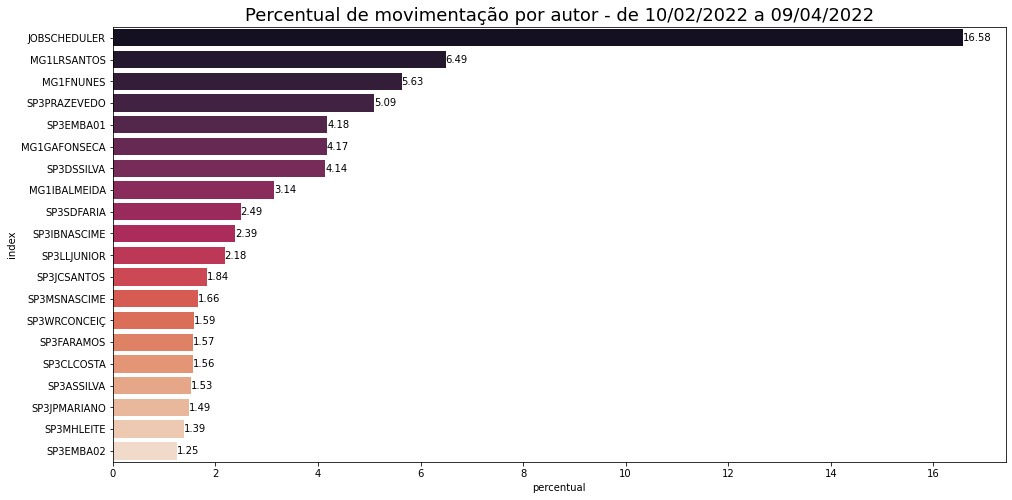

In [89]:
ax = sns.barplot(x='percentual', y='index', data=autor.head(20), palette=paleta)
ax.set_title('Percentual de movimentação por autor - de 10/02/2022 a 09/04/2022', fontsize=18)
ax.figure.set_size_inches(grafico_medio)
ax.bar_label(ax.containers[0], size=10)
ax = ax

#### Query que filtra pelo tipo da posição destino (Virtual ou Física)

In [90]:
dados_de_para = dados.query('Tipo != "Virtual"')['de_para'].value_counts().to_frame().reset_index().head(20)
dados_de_para.rename(columns={'index':'local','de_para':'quantidade'}, inplace=True)
dados_de_para.head()


,local,quantidade
0,GR-PROD > DOCA,5130
1,GR-YDI1 > PATIO,1726
2,GR-YDI1 > DOCA,1539
3,GI-YDO1 > DOCA,1218
4,RUA J > AAP-LOP3-SA1,1204


#### O gráfico abaixo exibe a quantidade de movimentações cujas posição destino existem fisicamente no estoque

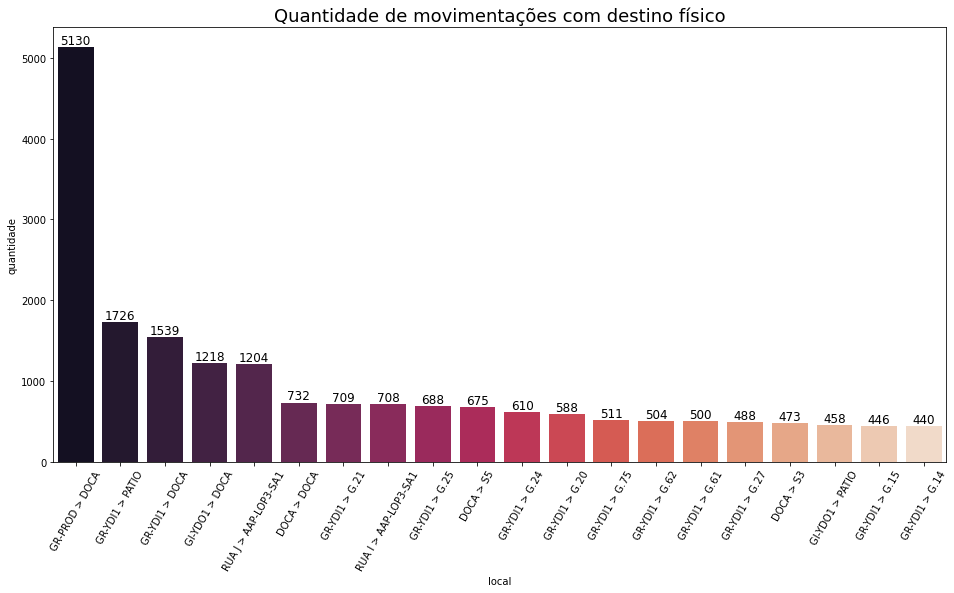

In [91]:
ax = sns.barplot(x='local', y='quantidade', data=dados_de_para, palette=paleta)
ax.figure.set_size_inches(grafico_medio)
ax.set_title('Quantidade de movimentações com destino físico', fontsize=18)
ax.bar_label(ax.containers[0], size=12)
plt.xticks(rotation=60)
ax = ax

In [92]:
posicoes.head()

,Pos,Tipo
0,4,Virtual
1,A-01-6,Rack
2,A-03-3,Rack
3,A-06-2,Rack
4,A-07-2,Rack


In [93]:
# Incluir o tipo da posição no dataframe das posições
pd_destino = pd_destino.merge(posicoes, left_on='index', right_on='Pos')
pd_origem = pd_origem.merge(posicoes, left_on='index', right_on='Pos')

In [94]:
pd_destino.head(5)

,index,pd_destino,Pos,Tipo
0,ITANF,176183,ITANF,Virtual
1,GI-YDO1,162547,GI-YDO1,Virtual
2,GR-PROD,69478,GR-PROD,Virtual
3,GR-YDI1,49698,GR-YDI1,Virtual
4,DOCA,12550,DOCA,Blocado


In [95]:
pd_origem.head(5)

,index,pd_origem,Pos,Tipo
0,ITANF,176175,ITANF,Virtual
1,GI-YDO1,145658,GI-YDO1,Virtual
2,GR-PROD,64667,GR-PROD,Virtual
3,GR-YDI1,50499,GR-YDI1,Virtual
4,AAP-LOP3-SA1,28277,AAP-LOP3-SA1,Blocado


#### O gráfico abaixo mostra a quantidade de movimenteção por tipo de posição

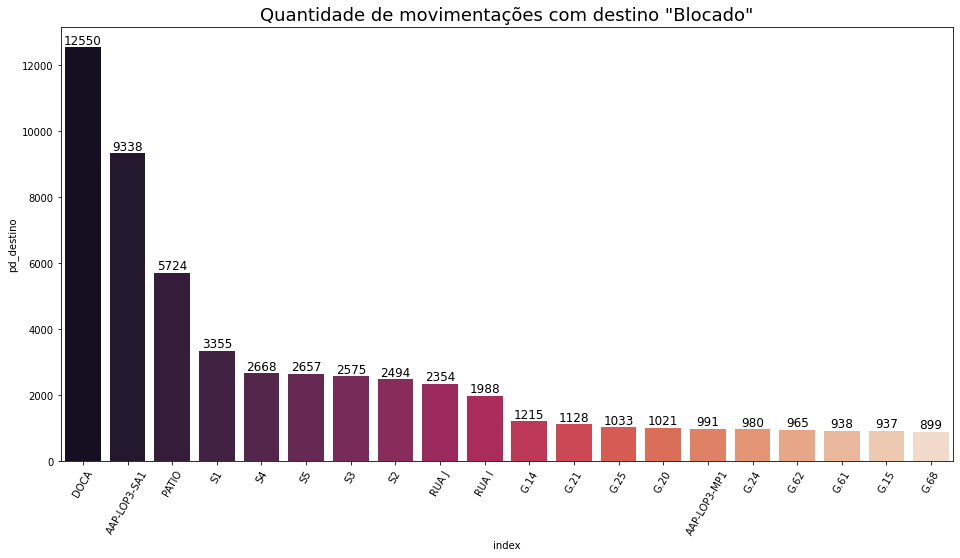

In [96]:
tipo = '"Blocado"'
query = 'Tipo ==' + tipo

pd_destino_resumo = pd_destino.query(query).head(20)
ax = sns.barplot(x='index', y='pd_destino', data=pd_destino_resumo, palette=paleta)
ax.figure.set_size_inches(grafico_medio)
ax.set_title('Quantidade de movimentações com destino ' + tipo, fontsize=18)
ax.bar_label(ax.containers[0], size=12)
plt.xticks(rotation=60)
ax = ax

#### O gráfico abaixo mostra os locais de origem mais movimentados

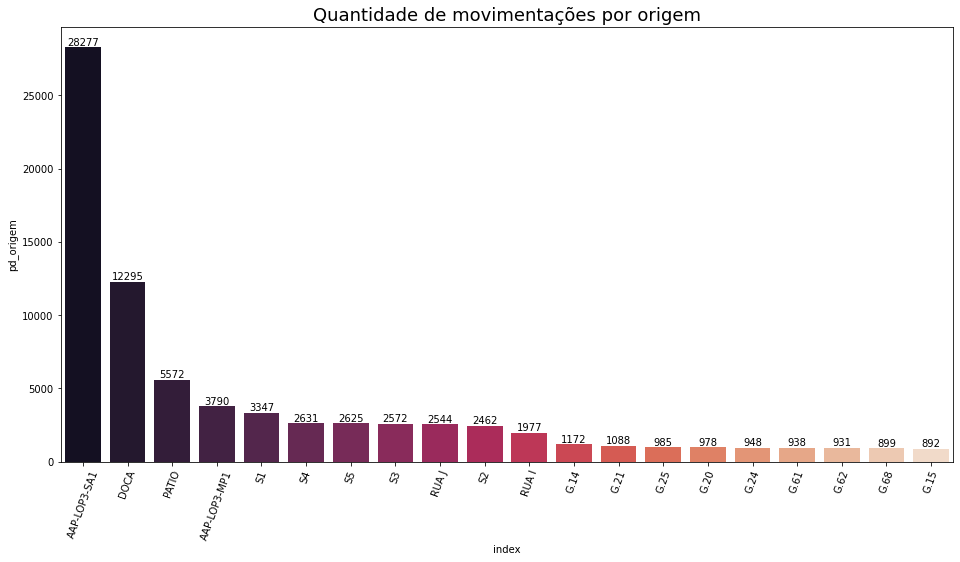

In [97]:
pd_origem_resumo = pd_origem.head(20)
ax = sns.barplot(x='index', y='pd_origem', data=pd_origem.query('Tipo != "Virtual"').head(20), palette=paleta)
ax.bar_label(ax.containers[0], size=10)
ax.figure.set_size_inches(grafico_medio)
ax.set_title('Quantidade de movimentações por origem', fontsize=18)
plt.xticks(rotation=70)
ax = ax

In [98]:
de_para = dados['de_para'].value_counts().to_frame().reset_index()
de_para.head(5)

,index,de_para
0,ITANF > ITANF,79219
1,GR-PROD > GR-PROD,19912
2,ITANF > GI-YDO1,16598
3,GR-YDI1 > ITANF,15847
4,GR-PROD > DOCA,5130


In [99]:
de_para.shape

(32805, 2)

#### O gráfico abaixo mostra as 20 combinações de posições mais frequêntes, independente de ser física ou virtual

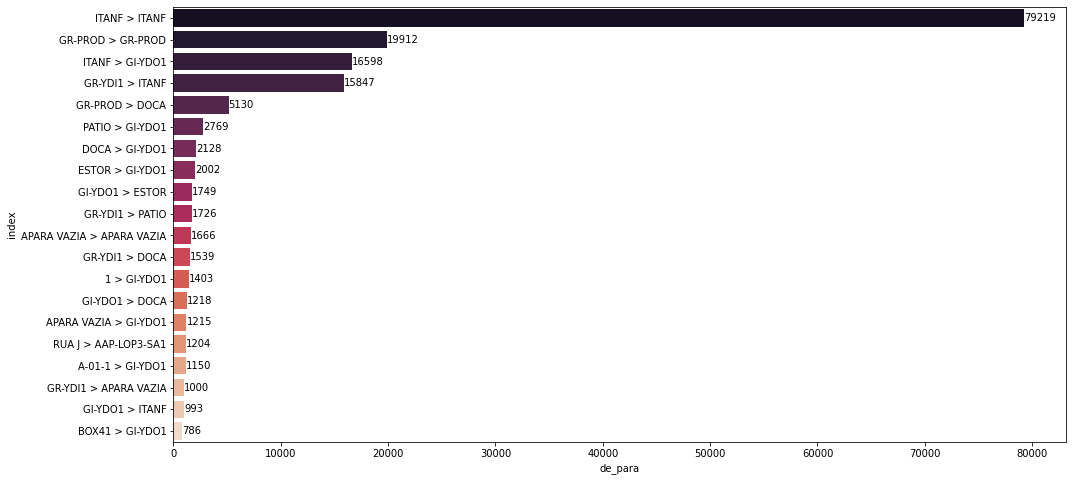

In [100]:
ax = sns.barplot(x='de_para', y='index', data=de_para.head(20), palette=paleta)
ax.figure.set_size_inches(grafico_medio)
ax.bar_label(ax.containers[0], size=10)
ax = ax

In [101]:
dados.head()

,tipo_processo,autor,data_criacao,hora_criacao,pd_origem,pd_destino,produto,tipo_estoque,desc_tipo_estoque,uc,dia_semana,nome_dia_semana,de_para,Pos,Tipo
0,Registro da entrada de mercadorias,SP3EMBA01,2022-01-31,23:59:34,NaN,GR-PROD,509002,Estoque utilização livre 005,01,<NA>,0,seg,NaN,GR-PROD,Virtual
1,Registro da entrada de mercadorias,SP3PROD01,2022-01-31,23:59:20,NaN,GR-PROD,SA0593,Estoque QA 005,03,<NA>,0,seg,NaN,GR-PROD,Virtual
2,Registro da entrada de mercadorias,SP3PROD01,2022-01-31,23:58:36,NaN,GR-PROD,SA0593,Estoque QA 005,03,<NA>,0,seg,NaN,GR-PROD,Virtual
3,Registro da entrada de mercadorias,SP3PROD01,2022-01-31,23:57:53,NaN,GR-PROD,SA0593,Estoque QA 005,03,<NA>,0,seg,NaN,GR-PROD,Virtual
4,Transferência interna de estoque,SP3EMBA01,2022-01-31,23:57:38,GR-PROD,GR-PROD,SA0579,Estoque QA 005,03,112345673000001352,0,seg,GR-PROD > GR-PROD,GR-PROD,Virtual


#### O gráfico abaixo mostra a quantidade de movimentações por dia

In [102]:
datas = dados['data_criacao'].value_counts().to_frame().reset_index()
datas['dia'] = datas['index'].dt.day
datas['mes'] = datas['index'].dt.month
datas['dia_mes'] = datas['index'].dt.strftime('%d/%m')

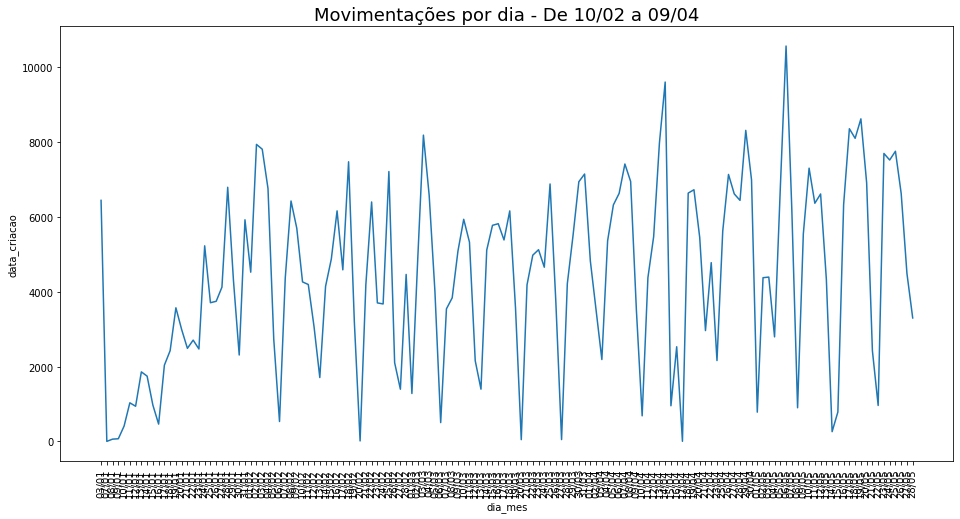

In [103]:
ax = sns.lineplot(x='dia_mes', y='data_criacao', data=datas.sort_values(by='index'), palette=paleta)
ax.figure.set_size_inches(grafico_medio)
#ax.bar_label(ax.containers[0], size=9)
ax.set_title('Movimentações por dia - De 10/02 a 09/04', fontsize=18)
#ax.set_xticklabels([])
plt.xticks(rotation=90)
ax = ax


In [104]:
produtos = dados['produto'].value_counts().to_frame(). reset_index()
produtos.head(2)

,index,produto
0,SA0309,49637
1,SA0441,11818


In [105]:
produtos['acumulado'] = produtos['produto'].cumsum()
produtos['percentual'] = ((produtos['acumulado'] / produtos['produto'].sum()) * 100).round(2)
produtos.head()

,index,produto,acumulado,percentual
0,SA0309,49637,49637,8.37
1,SA0441,11818,61455,10.36
2,SZ0357,10809,72264,12.19
3,SA0215,10486,82750,13.95
4,SA0593,9431,92181,15.54


#### Classificação ABCD

<p><strong>A:</strong> até 25%
<p><strong>B:</strong> de 25% a 50%
<p><strong>C:</strong> de 50% a 75%
<p><strong>D:</strong> maior que 75%

In [106]:
produtos['Curva'] = produtos.percentual.apply(lambda x: 'A' if x <= 25 else 'B' if x <= 50 else 'C' if x <= 75 else 'D')
produtos.head()

,index,produto,acumulado,percentual,Curva
0,SA0309,49637,49637,8.37,A
1,SA0441,11818,61455,10.36,A
2,SZ0357,10809,72264,12.19,A
3,SA0215,10486,82750,13.95,A
4,SA0593,9431,92181,15.54,A


In [107]:
produtos.head(10)

,index,produto,acumulado,percentual,Curva
0,SA0309,49637,49637,8.37,A
1,SA0441,11818,61455,10.36,A
2,SZ0357,10809,72264,12.19,A
3,SA0215,10486,82750,13.95,A
4,SA0593,9431,92181,15.54,A
5,509002,8390,100571,16.96,A
6,SA0166,7911,108482,18.29,A
7,SA0579,7618,116100,19.58,A
8,SA0192,6209,122309,20.62,A
9,SA0155,5428,127737,21.54,A


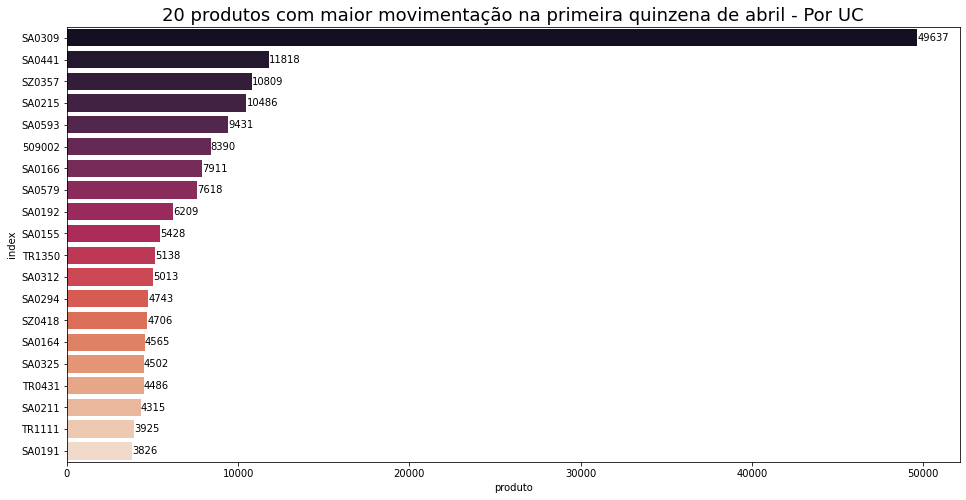

In [108]:
ax = sns.barplot(x='produto', y='index', data=produtos.head(20), palette=paleta)
ax.set_title('20 produtos com maior movimentação na primeira quinzena de abril - Por UC', fontsize=18)
ax.figure.set_size_inches(grafico_medio)
ax.bar_label(ax.containers[0], size=10)
ax = ax

In [109]:
produtos.head()

,index,produto,acumulado,percentual,Curva
0,SA0309,49637,49637,8.37,A
1,SA0441,11818,61455,10.36,A
2,SZ0357,10809,72264,12.19,A
3,SA0215,10486,82750,13.95,A
4,SA0593,9431,92181,15.54,A


In [110]:
teste = produtos.groupby('Curva')['produto'].sum().to_frame()
teste

,produto
Curva,
A,147337
B,148497
C,148748
D,148444


#### Merge da quantidade de movimentação com a quantidade em estoque

In [111]:
estoque_por_item = estoque['Produto'].value_counts().to_frame().reset_index()
estoque_por_item.head()

,index,Produto
0,SA0192,349
1,SA0593,240
2,SA0191,212
3,SA0166,174
4,SA0163,172


In [112]:
produtos.head()

,index,produto,acumulado,percentual,Curva
0,SA0309,49637,49637,8.37,A
1,SA0441,11818,61455,10.36,A
2,SZ0357,10809,72264,12.19,A
3,SA0215,10486,82750,13.95,A
4,SA0593,9431,92181,15.54,A


In [113]:
nova_curva = produtos.merge(estoque_por_item, left_on='index', right_on='index', how='outer')
nova_curva.head()

,index,produto,acumulado,percentual,Curva,Produto
0,SA0309,49637.0,49637.0,8.37,A,159.0
1,SA0441,11818.0,61455.0,10.36,A,66.0
2,SZ0357,10809.0,72264.0,12.19,A,23.0
3,SA0215,10486.0,82750.0,13.95,A,119.0
4,SA0593,9431.0,92181.0,15.54,A,240.0


In [114]:
nova_curva['percentual_estoque'] = ((nova_curva['Produto'] / nova_curva['Produto'].sum())*100).round(2)

In [115]:
nova_curva.head(20)

,index,produto,acumulado,percentual,Curva,Produto,percentual_estoque
0,SA0309,49637.0,49637.0,8.37,A,159.0,1.64
1,SA0441,11818.0,61455.0,10.36,A,66.0,0.68
2,SZ0357,10809.0,72264.0,12.19,A,23.0,0.24
3,SA0215,10486.0,82750.0,13.95,A,119.0,1.23
4,SA0593,9431.0,92181.0,15.54,A,240.0,2.48
5,509002,8390.0,100571.0,16.96,A,16.0,0.17
6,SA0166,7911.0,108482.0,18.29,A,174.0,1.80
7,SA0579,7618.0,116100.0,19.58,A,90.0,0.93
8,SA0192,6209.0,122309.0,20.62,A,349.0,3.61
9,SA0155,5428.0,127737.0,21.54,A,24.0,0.25


Text(0.5, 1.0, 'Quantidade de movimentação por item')

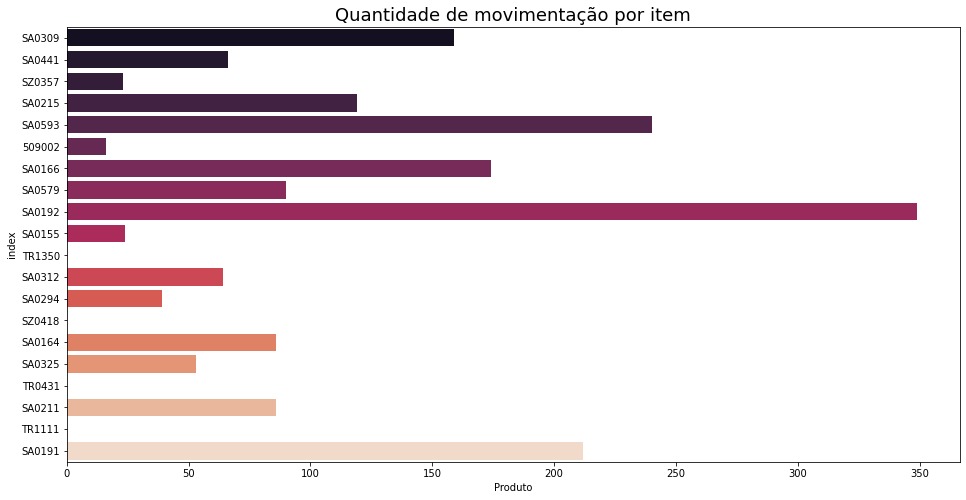

In [116]:
ax = sns.barplot(x='Produto', y='index', data=nova_curva.head(20), palette=paleta)
ax.figure.set_size_inches(grafico_medio)
ax.set_title('Quantidade de movimentação por item', fontsize=18)